In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [64]:
titanic_data = pd.read_csv('Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic_data.shape

(891, 12)

In [66]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
titanic_data = titanic_data.drop(columns = 'Cabin', axis = 1)

In [69]:
titanic_data['Age'] = titanic_data['Age'].fillna(int(titanic_data['Age'].mean()))

In [70]:
titanic_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [71]:
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

In [72]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [73]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

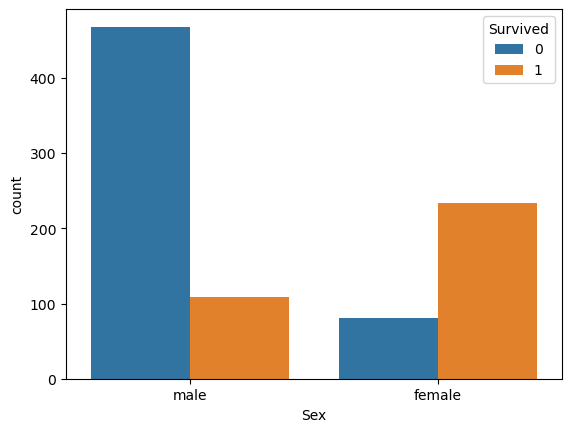

In [74]:
sns.countplot(data=titanic_data,x='Sex',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

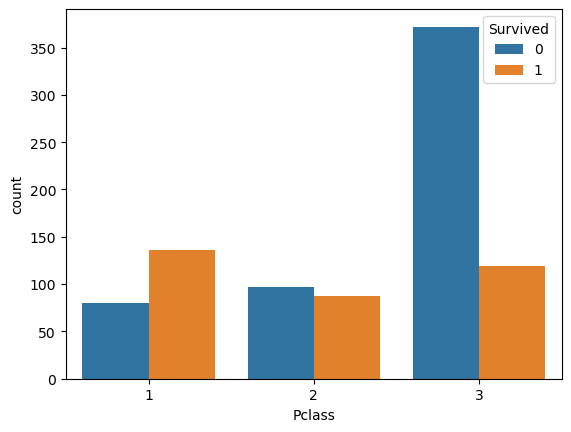

In [75]:
sns.countplot(data=titanic_data,x='Pclass', hue='Survived')

In [76]:
label_encoder = LabelEncoder()

In [77]:
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

In [78]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [79]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.00,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.00,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.0,1,2,W./C. 6607,23.45,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.00,0
890,891,0,3,"Dooley, Mr. Patrick",1,32.0,0,0,370376,7.75,1


In [83]:
features = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis = 1)
target = titanic_data['Survived']

In [84]:
features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [86]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [105]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=3)
print(features.shape,features_train.shape,features_test.shape)
print(target.shape,target_train.shape,target_test.shape)

(891, 7) (712, 7) (179, 7)
(891,) (712,) (179,)


In [106]:
regressor = XGBClassifier()

In [107]:
regressor.fit(features_train,target_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [108]:
training_prediction = regressor.predict(features_train)
training_accuracy = accuracy_score(training_prediction,target_train)
print('Accuracy on training data is',training_accuracy)

testing_prediction = regressor.predict(features_test)
testing_accuracy = accuracy_score(testing_prediction,target_test)
print('Accuracy on training data is',testing_accuracy)

Accuracy on training data is 0.9634831460674157
Accuracy on training data is 0.8044692737430168


In [113]:
input_data1 = np.asarray([[3,0,40,1,0,9.475,2]]) #0
input_data2 = np.asarray([[2,0,3,1,2,41.5792,0]]) #1
print(regressor.predict(input_data1))
print(regressor.predict(input_data2))

[0]
[1]
